In [5]:
# !pip install --upgrade --user ipykernel uproot4 awkward1 particle boost-histogram matplotlib mplhep pandas numexpr autograd hist hist[plot] humanize
# !pip install --upgrade --user uncertainties

In [6]:
import uproot4
from hist import Hist
import hist
import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

from efficiency_fit import build_eff_plot

%matplotlib inline

# Pretty printing arrays
from pprint import pprint

In [7]:
input_data = [
(1.0, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_1.0GeV.root"),
(1.5, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_1.5GeV.root"),
(2.0, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_2.0GeV.root"),
(2.5, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_2.5GeV.root"),
(3.0, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_3.0GeV.root"),
(3.5, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_3.5GeV.root"),
(4.0, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_4.0GeV.root"),
(4.5, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_4.5GeV.root"),
(5.0, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_5.0GeV.root"),
(5.5, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_5.5GeV.root"),
(6.0, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_6.0GeV.root"),
(6.5, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_6.5GeV.root"),
(7.0, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_7.0GeV.root"),
(7.5, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_7.5GeV.root"),
(8.0, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_8.0GeV.root"),
(8.5, "dd4pod_example_data/test_1000evt_gamma_1x_31y_0z_8.5GeV.root"),
]

In [8]:
fit_input_data = []
true_energies = []
sigmas = []
sigma_div_e_vals = []
for true_energy, file_name in input_data:
    events_tree = uproot4.open(file_name)["events/EcalEndcapNHits/"]    
    edeps = events_tree['EcalEndcapNHits.energyDeposit'].array()
    energy_per_event = ak.sum(edeps, axis=-1)
    sigma = np.std(energy_per_event)
    mean = np.mean(energy_per_event)
    rms = np.sqrt(np.mean(energy_per_event**2))
    
    print(f"Energy = {true_energy}, mean = {mean}, RMS = {rms}, Sigma = {sigma} sigma/Energy = {sigma/rms}")
    sigma_div_e_vals.append(sigma/true_energy)
    sigmas.append(sigma)
    true_energies.append(true_energy)
    # noinspection PyTypeChecker
    h1_energies = Hist(hist.axis.Regular(100, true_energy - true_energy/5, true_energy + true_energy/5, name="E GeV"))
    h1_energies.fill(energy_per_event)
    #h1_energies.plot()
    #plt.show()

    fit_input_data.append([true_energy, h1_energies.to_numpy()])

Energy = 1.0, mean = 0.988564294726396, RMS = 0.9888337093118784, Sigma = 0.023081158194335313 sigma/Energy = 0.023341799512879985
Energy = 1.5, mean = 1.4824177696099061, RMS = 1.4826230316672677, Sigma = 0.02467002989522507 sigma/Energy = 0.01663944871238285
Energy = 2.0, mean = 1.9757064423983024, RMS = 1.9758623190383138, Sigma = 0.024818486281530154 sigma/Energy = 0.012560837889559905
Energy = 2.5, mean = 2.4692900516595966, RMS = 2.4704142738254045, Sigma = 0.07452063536530609 sigma/Energy = 0.030165238338714685
Energy = 3.0, mean = 2.9601888623889994, RMS = 2.9612577646855143, Sigma = 0.07955782738593428 sigma/Energy = 0.02686622837589531
Energy = 3.5, mean = 3.4547262449900566, RMS = 3.4549892811989396, Sigma = 0.042632210551015355 sigma/Energy = 0.012339317746369753
Energy = 4.0, mean = 3.943053631969, RMS = 3.9444728632953088, Sigma = 0.10580276314523893 sigma/Energy = 0.02682304247286638
Energy = 4.5, mean = 4.4369139911894475, RMS = 4.4379831904934175, Sigma = 0.09741167224

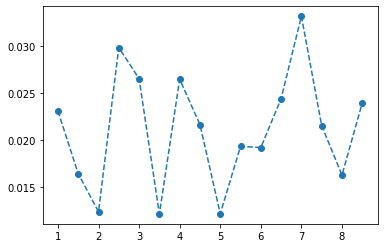

In [9]:
plt.plot(true_energies, sigma_div_e_vals, "o--")

In [10]:
pprint(fit_input_data)

[[1.0,
  (array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
         1.,   0.,   0.,   2.,   1.,   2.,   4.,  12.,   6.,  20.,  19.,
        53.,  52., 129., 204., 246., 242.,   1.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.]),
   array([0.8  , 0.804, 0.808, 0.812, 0.816, 0.82 , 0.824, 0.828, 0.832,
       0.836, 0.84 , 0.844, 0.848, 0.852, 0.856, 0.86 , 0.864, 0.868,
       0.872, 0.876, 0.88 , 0.884, 0.888, 0.892, 0.896, 0.9  , 0.904,
       0.908, 0.912, 0.916, 0.92 , 0.924, 0.928, 0.932, 0.936, 0.94 ,
       0.944, 0.948, 0.952, 0.956, 

In [11]:
eff_fit, eff_axes, ind_fit_result = build_eff_plot(input_data)

ValueError: diff requires input that is at least one dimensional